# PDAS End-Semester Assignment - COE Analysis

## Import Dependencies

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns

## Load Data

Sources:

1.  coe.csv - https://data.gov.sg/dataset/coe-bidding-results?resource_id=f7bbdc43-c568-4e60-9afa-b77ba5a14aa0
2.  pqp.csv - https://data.gov.sg/dataset/coe-bidding-results?resource_id=85deb904-fbf9-46bc-80fd-9676213bbf1f
3.  pop.csv - https://data.gov.sg/dataset/monthly-motor-vehicle-population-by-vehicle-quota-category?view_id=46b41a34-4213-4f88-be92-4c9cb8c7c25b&resource_id=31b9aa99-c8ff-4e5c-9568-bdf3c6863bef
4.  reg.csv - https://data.gov.sg/dataset/monthly-new-registration-of-motor-vehicles-by-vehicle-quota-categories
5.  dereg.csv - https://data.gov.sg/dataset/monthly-de-registered-motor-vehicles-under-vehicle-quota-system-vqs

In [36]:
coe = pd.read_csv('data/coe.csv')
print(coe.dtypes, coe.count(), coe.describe().round(2), coe.head(), sep='\n\n')

month            object
bidding_no        int64
vehicle_class    object
quota             int64
bids_success      int64
bids_received     int64
premium           int64
dtype: object

month            1230
bidding_no       1230
vehicle_class    1230
quota            1230
bids_success     1230
bids_received    1230
premium          1230
dtype: int64

       bidding_no    quota  bids_success  bids_received   premium
count      1230.0  1230.00       1230.00        1230.00   1230.00
mean          1.5   607.57        597.76         901.18  42631.47
std           0.5   465.33        463.83         689.89  25180.31
min           1.0   140.00        126.00         196.00    852.00
25%           1.0   319.00        311.25         449.00  27001.00
50%           1.5   400.50        391.00         622.00  45022.50
75%           2.0   698.75        691.00        1086.75  60001.00
max           2.0  2272.00       2246.00        4545.00  97889.00

     month  bidding_no vehicle_class  quota  bids_succ

In [37]:
pqp = pd.read_csv('data/pqp.csv')
print(pqp.dtypes, pqp.count(), pqp.describe().round(2), pqp.head(), sep='\n\n')

month            object
vehicle_class    object
pqp               int64
dtype: object

month            492
vehicle_class    492
pqp              492
dtype: int64

            pqp
count    492.00
mean   38473.70
std    24831.58
min      867.00
25%    15635.50
50%    40787.50
75%    56496.75
max    93497.00

     month vehicle_class    pqp
0  2010-02    Category A  18266
1  2010-02    Category B  19146
2  2010-02    Category C  18212
3  2010-02    Category D    867
4  2010-03    Category A  19331


In [38]:
pop = pd.read_csv('data/pop.csv')
print(pop.dtypes, pop.count(), pop.describe().round(2), pop.head(), sep='\n\n')

month       object
category    object
number       int64
dtype: object

month       300
category    300
number      300
dtype: int64

          number
count     300.00
mean   160183.83
std    113926.04
min     22440.00
25%     29376.75
50%    146132.00
75%    280951.25
max    341519.00

     month    category  number
0  2014-01  Category A  341519
1  2014-01  Category B  279902
2  2014-01  Category C  154144
3  2014-01  Category D  144631
4  2014-01       Taxis   27779


In [39]:
reg = pd.read_csv('data/reg.csv')
print(reg.dtypes, reg.count(), reg.describe().round(2), reg.head(), sep='\n\n')

month       object
category    object
number       int64
dtype: object

month       532
category    532
number      532
dtype: int64

        number
count   532.00
mean   1177.80
std    1255.02
min       0.00
25%     271.75
50%     626.00
75%    1631.00
max    5927.00

     month        category  number
0  2014-01      Category A     844
1  2014-01      Category B    1224
2  2014-01      Category C     309
3  2014-01  Category C-ETS     123
4  2014-01      Category D    1017


In [40]:
dereg = pd.read_csv('data/dereg.csv')
print(dereg.dtypes, dereg.count(), dereg.describe().round(2), dereg.head(), sep='\n\n')

month       object
category    object
number       int64
dtype: object

month       456
category    456
number      456
dtype: int64

        number
count   456.00
mean   1382.29
std    1257.20
min       9.00
25%     388.00
50%    1006.50
75%    2179.75
max    7040.00

     month    category  number
0  2014-01  Category A    1011
1  2014-01  Category B     927
2  2014-01  Category C     711
3  2014-01  Category D     760
4  2014-01       Taxis     143


## Simulate Dirty Data

### COE Dataset
___
Remove bidding session data

Change type of `premium` to string

In [41]:
coe.sort_values(by='bidding_no', inplace=True)
coe['bidding_no'] = coe['bidding_no'].drop_duplicates()
coe['premium'] = coe['premium'].astype(str)

### PQP Dataset
___
Make category nomenclature inconsistent

In [42]:
even_pqp_rows = pqp.index % 2 == 0
pqp.loc[even_pqp_rows, 'vehicle_class'] = pqp.loc[even_pqp_rows, 'vehicle_class'].str.lower()

### Deregistration Dataset
___
Change date representation format

In [43]:
dereg['month'] = dereg['month'].str.replace('-', repl='/', regex=False)

## Inspect Data

### COE Dataset

In [44]:
print(coe.dtypes, coe.describe().round(2), coe.head(), sep='\n\n')

month             object
bidding_no       float64
vehicle_class     object
quota              int64
bids_success       int64
bids_received      int64
premium           object
dtype: object

       bidding_no    quota  bids_success  bids_received
count        2.00  1230.00       1230.00        1230.00
mean         1.50   607.57        597.76         901.18
std          0.71   465.33        463.83         689.89
min          1.00   140.00        126.00         196.00
25%          1.25   319.00        311.25         449.00
50%          1.50   400.50        391.00         622.00
75%          1.75   698.75        691.00        1086.75
max          2.00  2272.00       2246.00        4545.00

       month  bidding_no vehicle_class  quota  bids_success  bids_received  \
0    2010-01         1.0    Category A   1152          1145           1342   
672  2015-08         NaN    Category C    183           183            263   
673  2015-08         NaN    Category D    356           356            

### PQP Dataset

In [45]:
print(pqp.dtypes, pqp.describe().round(2), pqp.head(), sep='\n\n')

month            object
vehicle_class    object
pqp               int64
dtype: object

            pqp
count    492.00
mean   38473.70
std    24831.58
min      867.00
25%    15635.50
50%    40787.50
75%    56496.75
max    93497.00

     month vehicle_class    pqp
0  2010-02    category a  18266
1  2010-02    Category B  19146
2  2010-02    category c  18212
3  2010-02    Category D    867
4  2010-03    category a  19331


### Population Dataset

In [46]:
print(pop.dtypes, pop.describe().round(2), pop.head(), sep='\n\n')

month       object
category    object
number       int64
dtype: object

          number
count     300.00
mean   160183.83
std    113926.04
min     22440.00
25%     29376.75
50%    146132.00
75%    280951.25
max    341519.00

     month    category  number
0  2014-01  Category A  341519
1  2014-01  Category B  279902
2  2014-01  Category C  154144
3  2014-01  Category D  144631
4  2014-01       Taxis   27779


### Registration Dataset

In [47]:
print(reg.dtypes, reg.describe().round(2), reg.head(), sep='\n\n')

month       object
category    object
number       int64
dtype: object

        number
count   532.00
mean   1177.80
std    1255.02
min       0.00
25%     271.75
50%     626.00
75%    1631.00
max    5927.00

     month        category  number
0  2014-01      Category A     844
1  2014-01      Category B    1224
2  2014-01      Category C     309
3  2014-01  Category C-ETS     123
4  2014-01      Category D    1017


### Deregistration Dataset

In [48]:
print(dereg.dtypes, dereg.describe().round(2), dereg.head(), sep='\n\n')

month       object
category    object
number       int64
dtype: object

        number
count   456.00
mean   1382.29
std    1257.20
min       9.00
25%     388.00
50%    1006.50
75%    2179.75
max    7040.00

     month    category  number
0  2014/01  Category A    1011
1  2014/01  Category B     927
2  2014/01  Category C     711
3  2014/01  Category D     760
4  2014/01       Taxis     143


## Data Wrangling

### COE Dataset
___
Steps:

1.  Rename columns
2.  Fill missing data for `Bidding Session`
3.  Correct type for `Bidding Session` to byte
4.  Correct type for `Premium` to integer
5.  Remove redundant "Category " prefix for `Category`

In [49]:
coe.rename(columns=dict(
    month='Date',
    bidding_no='Bidding Session',
    vehicle_class='Category',
    quota='Quota',
    bids_success='Successful Bids',
    bids_received='Received Bids',
    premium='Premium'
), inplace=True)
coe['Bidding Session'] = coe['Bidding Session'].fillna(method='ffill').astype(np.byte)
coe['Premium'] = coe['Premium'].astype(np.int64)
coe['Category'] = coe['Category'].str.extract(r'[\w]*\s(\w)')
print(coe.dtypes, coe.describe(), coe.head(), sep='\n\n')

Date               object
Bidding Session      int8
Category           object
Quota               int64
Successful Bids     int64
Received Bids       int64
Premium             int64
dtype: object

       Bidding Session        Quota  Successful Bids  Received Bids  \
count      1230.000000  1230.000000      1230.000000    1230.000000   
mean          1.500000   607.574797       597.758537     901.183740   
std           0.500203   465.326305       463.829652     689.894509   
min           1.000000   140.000000       126.000000     196.000000   
25%           1.000000   319.000000       311.250000     449.000000   
50%           1.500000   400.500000       391.000000     622.000000   
75%           2.000000   698.750000       691.000000    1086.750000   
max           2.000000  2272.000000      2246.000000    4545.000000   

            Premium  
count   1230.000000  
mean   42631.473984  
std    25180.312857  
min      852.000000  
25%    27001.000000  
50%    45022.500000  
75%    60

### PQP Dataset
___
Steps:

1.  Rename columns
2.  Standardize format for `Category`
3.  Remove redundant "category " prefix for `Category`

In [50]:
pqp.rename(columns=dict(
    month='Date',
    vehicle_class='Category',
    pqp='PQP'
), inplace=True)
pqp['Category'] = pqp['Category'].str.extract(pat=r'[\w]*\s(\w)', expand=False).str.upper()
print(pqp.dtypes, pqp.describe(), pqp.head(), sep='\n\n')

Date        object
Category    object
PQP          int64
dtype: object

                PQP
count    492.000000
mean   38473.695122
std    24831.582072
min      867.000000
25%    15635.500000
50%    40787.500000
75%    56496.750000
max    93497.000000

      Date Category    PQP
0  2010-02        A  18266
1  2010-02        B  19146
2  2010-02        C  18212
3  2010-02        D    867
4  2010-03        A  19331


### Population Dataset
___
Steps:

1.  Rename columns
2.  Remove rows where `Category` is "Taxis" or "Vehicles Exempted From VQS"
3.  Remove redundant "Category " prefix for `Category`

In [51]:
pop.rename(columns=dict(
    month='Date',
    category='Category',
    number='Population'
), inplace=True)

pop = pop[~pop['Category'].str.contains('Taxis')]
pop = pop[~pop['Category'].str.contains('Vehicles Exempted From VQS')]

pop['Category'] = pop['Category'].str.extract(pat=r'[\w]*\s(\w)', expand=False).str.upper()

print(pop.dtypes, pop.describe(), pop.head(), sep='\n\n')

Date          object
Category      object
Population     int64
dtype: object

          Population
count     200.000000
mean   226140.955000
std     79892.913087
min    140323.000000
25%    146852.000000
50%    216956.500000
75%    299557.750000
max    341519.000000

      Date Category  Population
0  2014-01        A      341519
1  2014-01        B      279902
2  2014-01        C      154144
3  2014-01        D      144631
6  2014-02        A      341169


### Registration Dataset
___
Steps:

1.  Rename columns
2.  Remove rows where `Category` is "Taxis" or "Vehicles Exempted from VQS"
3.  Combine "Category C" and "Category C-ETS" in `Category` by `Date`
4.  Remove redundant "Category " prefix for `Category` 

In [52]:
reg.rename(columns=dict(
    month='Date',
    category='Category',
    number='Number of Registered'
), inplace=True)

reg = reg[~reg['Category'].str.contains('Taxis')]
reg = reg[~reg['Category'].str.contains('Vehicles Exempted From VQS')]

reg['Category'] = reg['Category'].str.replace(pat='Category C-ETS', repl='Category C')
reg = reg.groupby(by=['Date', 'Category']).sum().reset_index()

reg['Category'] = reg['Category'].str.extract(pat=r'[\w]*\s(\w)', expand=False).str.upper()

print(reg.dtypes, reg.describe(), reg.head(), pd.unique(reg['Category'].values), sep='\n\n')

Date                    object
Category                object
Number of Registered     int64
dtype: object

       Number of Registered
count            304.000000
mean            1953.549342
std             1227.655123
min              244.000000
25%              901.250000
50%             1543.000000
75%             2956.500000
max             5927.000000

      Date Category  Number of Registered
0  2014-01        A                   844
1  2014-01        B                  1224
2  2014-01        C                   432
3  2014-01        D                  1017
4  2014-02        A                   754

['A' 'B' 'C' 'D']


### Deregistration Dataset
___
Steps:

1.  Rename columns
2.  Remove rows where `Category` is "Taxis" or "Vehicles Exempted from VQS"
3.  Remove redundant "Category " prefix for `Category`
4.  Reformat `Date`

In [53]:
dereg.rename(columns=dict(
    month='Date',
    category='Category',
    number='Number of Deregistered'
), inplace=True)

dereg = dereg[~dereg['Category'].str.contains('Taxis')]
dereg = dereg[~dereg['Category'].str.contains('Vehicles Exempted from VQS')]

dereg['Category'] = dereg['Category'].str.extract(pat=r'[\w]*\s(\w)', expand=False).str.upper()
dereg['Date'] = dereg['Date'].str.replace(pat=r'/', repl='-')
dereg.reset_index(drop=True, inplace=True)

print(dereg.dtypes, dereg.describe(), dereg.head(), pd.unique(dereg['Category'].values), sep='\n\n')

Date                      object
Category                  object
Number of Deregistered     int64
dtype: object

       Number of Deregistered
count              304.000000
mean              1952.621711
std               1171.608577
min                553.000000
25%               1006.750000
50%               1487.000000
75%               2715.000000
max               7040.000000

      Date Category  Number of Deregistered
0  2014-01        A                    1011
1  2014-01        B                     927
2  2014-01        C                     711
3  2014-01        D                     760
4  2014-02        A                    1104

['A' 'B' 'C' 'D']


## Final Touch Up

Merge Datasets

In [54]:
coe_pqp = pd.merge(left=coe, right=pqp, on=['Date', 'Category'], how='inner')
reg_dereg = pd.merge(left=reg, right=dereg, on=['Date', 'Category'], how='inner')
coe_pqp_pop = pd.merge(left=coe_pqp, right=pop, on=['Date', 'Category'], how='inner')

clean = pd.merge(left=coe_pqp_pop, right=reg_dereg, on=['Date', 'Category'], how='inner')

Extract `Year` and `Month` from `Date`

In [55]:
clean[['Year', 'Month']] = clean['Date'].str.extract(r'(\d{4})-(\d{2})').astype(np.int16)

Sort combined dataset

In [56]:
clean.sort_values(by=['Date', 'Category', 'Bidding Session'], inplace=True)
clean.reset_index(drop=True, inplace=True)

Identify extreme outliers (anomalies)

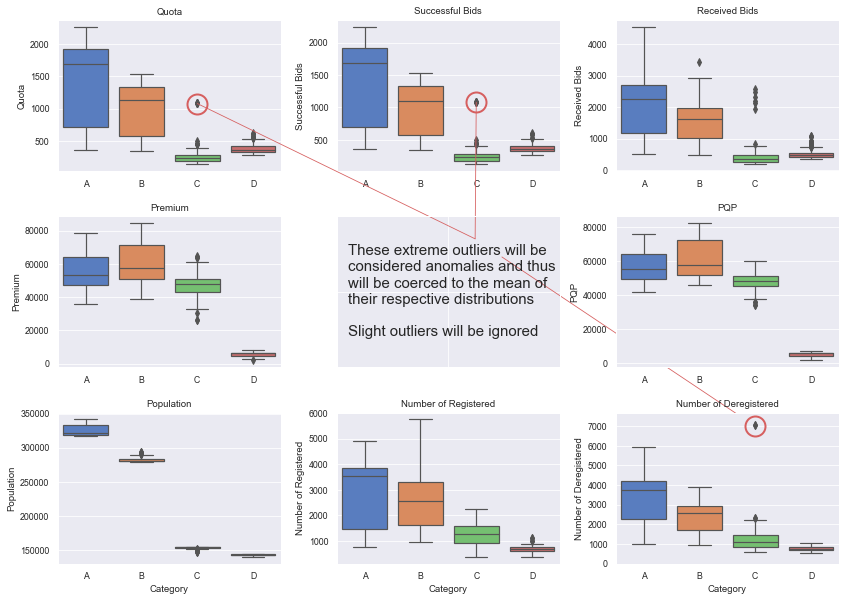

In [57]:
# Plot boxplots
fig1, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
variables = ['Quota', 'Successful Bids', 'Received Bids', 'Premium', 'PQP', 'Population', 'Number of Registered', 'Number of Deregistered']
axs = [ax1, ax2, ax3, ax4, ax6, ax7, ax8, ax9]
for i, var in enumerate(variables):
    sns.boxplot(data=clean, x='Category', y=var, ax=axs[i])
    axs[i].set_title(var)
    if i < 5:
        axs[i].set_xlabel('')

# Modify ax9
ax9.set_ylim(ymin=0, ymax=7700)

# Indicate Outliers
ax1.plot([2], [1080], 'o', ms=20, mec='r', mfc='none', mew=2)
ax2.plot([2], [1080], 'o', ms=20, mec='r', mfc='none', mew=2)
ax9.plot([2], [7000], 'o', ms=20, mec='r', mfc='none', mew=2)

# Empty the central axis for text (outliers HQ)
ax5.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], xticklabels=[], yticklabels=[])
ax5.annotate(text='''
These extreme outliers will be
considered anomalies and thus 
will be coerced to the mean of 
their respective distributions

Slight outliers will be ignored
''', xy=(0.05, 0.1), font=dict(
    size=15
))
ax5.add_artist(ConnectionPatch(xyA=(2, 1080), xyB=(0.62, 0.85), coordsA="data", coordsB="data", axesA=ax1, axesB=ax5, color="r"))
ax5.add_artist(ConnectionPatch(xyA=(2, 1080), xyB=(0.62, 0.85), coordsA="data", coordsB="data", axesA=ax2, axesB=ax5, color="r"))
ax5.add_artist(ConnectionPatch(xyA=(2, 7000), xyB=(0.74, 0.73), coordsA="data", coordsB="data", axesA=ax9, axesB=ax5, color="r"))

# Tighten Layout
plt.subplots_adjust(wspace=0.25, hspace=0.3)
fig1.savefig('./assets/anomalies.png')

Coerce anomalies

In [58]:
cat_c = clean['Category'] == 'C'
dereg_anomalies = clean['Number of Deregistered'] > 7000
quota_anomalies = clean['Quota'] > 1000

cat_c_dereg_mean = round(clean[cat_c & ~dereg_anomalies]['Number of Deregistered'].mean())
cat_c_quota_mean = round(clean[cat_c & ~quota_anomalies]['Quota'].mean())
cat_c_successful_bids_mean = round(clean[cat_c & ~quota_anomalies]['Successful Bids'].mean())

clean['Number of Deregistered'][cat_c & dereg_anomalies] = cat_c_dereg_mean
clean['Quota'][cat_c & quota_anomalies] = cat_c_quota_mean
clean['Successful Bids'][cat_c & quota_anomalies] = cat_c_successful_bids_mean

## Review Finalised Dataset

### Numerical & Statistical Summaries

In [59]:
print(clean.dtypes, clean.count(), clean.describe().round(2), clean.head(), sep='\n\n')

Date                      object
Bidding Session             int8
Category                  object
Quota                      int64
Successful Bids            int64
Received Bids              int64
Premium                    int64
PQP                        int64
Population                 int64
Number of Registered       int64
Number of Deregistered     int64
Year                       int16
Month                      int16
dtype: object

Date                      400
Bidding Session           400
Category                  400
Quota                     400
Successful Bids           400
Received Bids             400
Premium                   400
PQP                       400
Population                400
Number of Registered      400
Number of Deregistered    400
Year                      400
Month                     400
dtype: int64

       Bidding Session    Quota  Successful Bids  Received Bids   Premium  \
count            400.0   400.00           400.00         400.00    400.00  

In [60]:
sns.set_theme(context='paper', style='darkgrid', palette='muted')

### Graphical Summaries

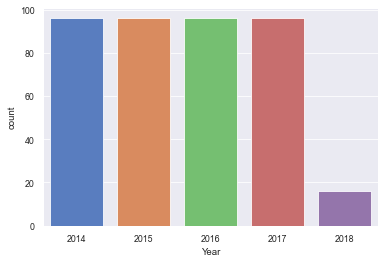

In [61]:
sns.countplot(data=clean, x='Year')
plt.savefig('./assets/year-counts.png')

2018 data is not complete. Take note when using sum to aggregate data by year.

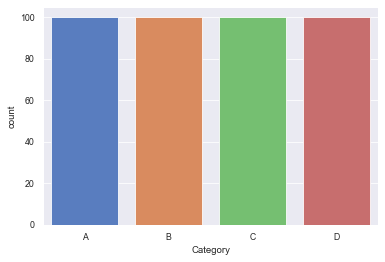

In [62]:
sns.countplot(data=clean, x='Category')
plt.savefig('./assets/category-counts.png')

Data for all categories are complete.

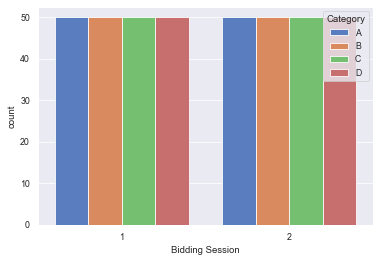

In [63]:
sns.countplot(data=clean, x='Bidding Session', hue='Category')
plt.savefig('./assets/bidding-session-counts.png')

Data for both bidding sessions are complete.

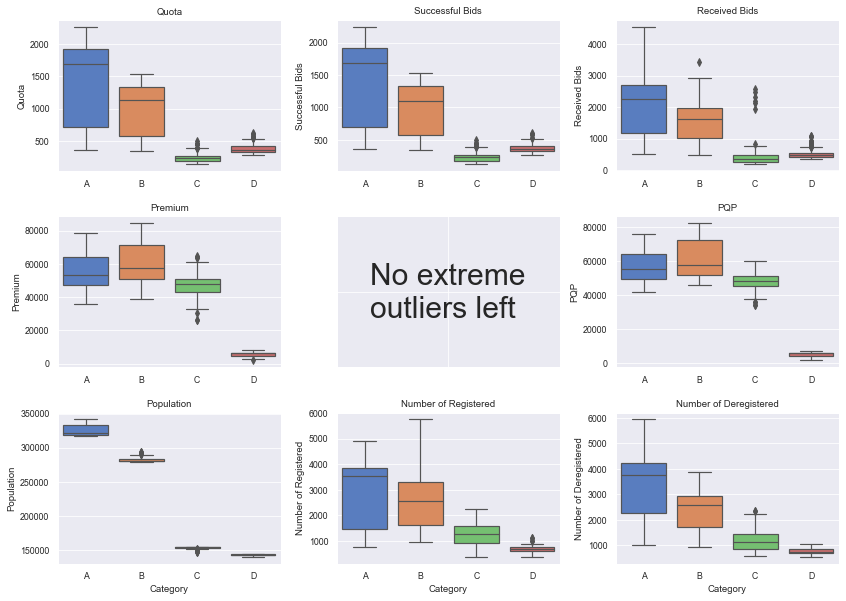

In [64]:
# Plot boxplots
fig2, ((ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
variables = ['Quota', 'Successful Bids', 'Received Bids', 'Premium', 'PQP', 'Population', 'Number of Registered', 'Number of Deregistered']
axs = [ax10, ax11, ax12, ax13, ax15, ax16, ax17, ax18]
for i, var in enumerate(variables):
    sns.boxplot(data=clean, x='Category', y=var, ax=axs[i])
    axs[i].set_title(var)
    if i < 5:
        axs[i].set_xlabel('')

# Empty the central axis for text (outliers HQ)
ax14.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], xticklabels=[], yticklabels=[])
ax14.annotate(text='No extreme\noutliers left', xy=(0.15, 0.33), font=dict(
    size=30
))

# Tighten Layout
plt.subplots_adjust(wspace=0.25, hspace=0.3)
fig2.savefig('./assets/outliers.png')

There are some outliers remaining but they are allowable.

The major anomalies have been removed to avoid skewed distributions.

### Exploratory Data Analysis (simple)

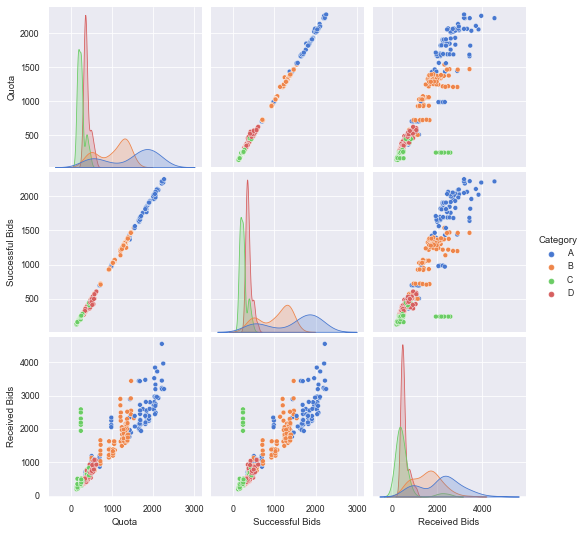

In [65]:
sns.pairplot(data=clean[['Quota', 'Successful Bids', 'Received Bids', 'Category']], hue='Category')
plt.savefig('./assets/eda-1.png')

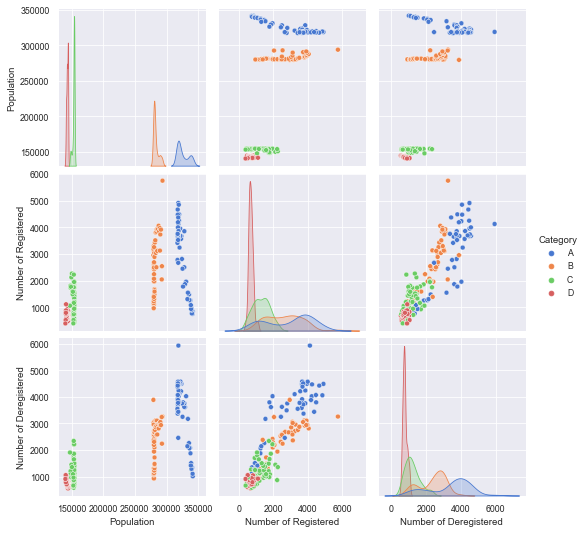

In [66]:
sns.pairplot(data=clean[['Population', 'Number of Registered', 'Number of Deregistered', 'Category']], hue='Category')
plt.savefig('./assets/eda-2.png')

## Export Finalised Dataset

In [67]:
clean.to_csv('data/out/clean.csv')